<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-датафрейме" data-toc-modified-id="Изучение-общей-информации-о-датафрейме-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации о датафрейме</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ игровой индустрии

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 года, и мы планируем кампанию на 2017 год. Нужно отработать принцип работы с данными. 

## Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Изучение общей информации о датафрейме

In [1]:
#импортируем требуемые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('home/an4ouce/datasets/games.csv')

games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Уже в первых 10 строках есть пропуски. Выведем информацию о датафрейме:

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 16715 строк и 11 столбцов. Видим, что самое большое количество пропусков в столбцах Critic_Score, User_Score, Rating. Визуализируем информацию о пропусках с помощью графика:

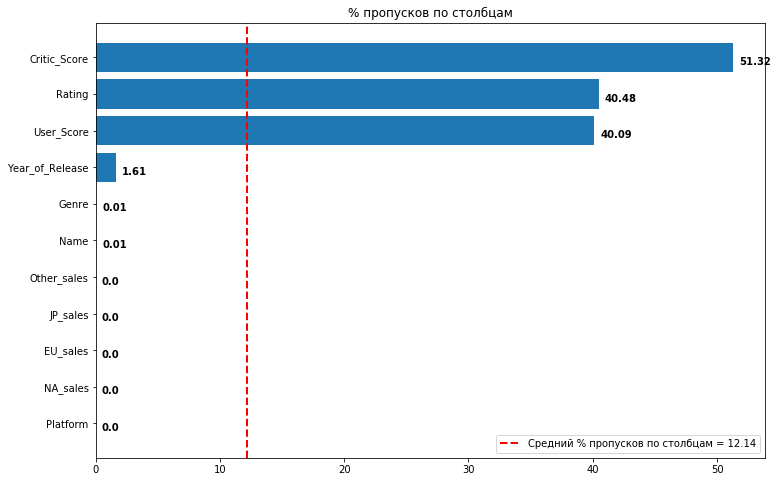

In [3]:
total_data = games.shape[0]
columns_data = games.columns.values.tolist()

nan = []

for col in columns_data:
    quantity_not_nan = games[col].count()
    percent_nan = ((total_data - quantity_not_nan) / total_data) * 100
    nan.append(percent_nan)
    
nan_percent = pd.Series(nan, index=columns_data)
nan_percent_mean = nan_percent.mean()
nan_percent.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(nan_percent.index, nan_percent.values)
ax.set_title('% пропусков по столбцам')

#построим линию, показывающую средний % пропусков по столбцам
plt.axvline(
    x=nan_percent_mean, linewidth=2,
    label='Средний % пропусков по столбцам = {}'.format(round(nan_percent_mean, 2)),
    color='r', linestyle='--')

plt.legend()

for i in ax.patches:
    plt.text(i.get_width()+0.5,
    i.get_y()+0.2, str(round(i.get_width(),2)),
    fontsize=10, fontweight='bold', color='black')

plt.show()

Действительно, в столбце Critic_Score пропусков больше половины (51,32%). Согласно информации сайта [metactitic.com](https://metacritic.com), он был основан в 2001 году. Возможно, нет оценок критиков для игр, выпущенных до 2001 года. Далее проверим это предположение. Возможно, не все игры оцениваются критиками, ведь игр очень много, все не оценить. Заполнить пропуски в этом столбце нельзя ни средним, ни медианой, даже если группировать по жанрам - две игры одного и того же жанра могут быть по-разному оценены критиками.

В столбцах Rating и User_Score пропусков немного меньше половины (40,48% и 40,09% соответственно). С User_Score ситуация такая же, как и с Critic_Score: не все игры были полулярны у пользователей, оценок нет или их мало, заполнить пропуски не получится, оценка игры пользователями - субъективный фактор. Значения в столбце User_Score имеют тип object, а нам нужен целочисленный тип.

Пропуска в столбце Rating сложно заполнить чем-то адекватным, ведь ни по жанру, ни по названию игры не определить возрастную категорию. Заменим отсутствующие значения на "undefined".

В столбце Year_of_Release 1,6% пропусков, далее подумаем, как их можно заполнить. Кроме того, значения в данном столбце в формате float, а нам для наглядности нужен тип int.

И самый малый процент пропусков в столбцах Genre и Name: по 0,01% соотвественно. Посмотрим на них:


In [4]:
games.query('Genre.isnull() or Name.isnull()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры с отсутствующим названием и жанром. Оставим пока как есть.
Получается, что мы не можем заполнить никакие пропуски, будем работать с тем, что есть. Лучше работать с "натуральными" данными, чем заполнить неверными значениями и исказить наш анализ.

### Вывод: 

Данные сырые; важные для нашего исследования столбцы имеют половину пропусков, которые не представляется возможным заполнить чем-то логичным. Далее займемся подготовкой данных: приведем названия столбцов к нижнему регистру, преобразуем данные в нужные типы.

## 2. Подготовка данных

Приведем названия столбцов к нижнему регистру:

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получилось. Теперь все-таки подумаем над заполнением пропусков. Проверим предположение, что оценок критиков нет для игр, выпущенных до 2001 года (год создания сайта [metacritic](http://metacritic.com)):

In [6]:
games.query('year_of_release < 2001')['critic_score'].isnull().sum()

2087

Нет, пропуска по старым играм (до 2001 года) составляют лишь четверть от общего количества пропусков в столбце Critic_Score. Возможно, не все выпущенные игры оценивались критиками, так как игр выпускалось огромное количество, и оценить абсолютно все не представлялось возможным.

Проверим то же предположение для оценок пользователей:

In [7]:
games.query('year_of_release < 2001')['user_score'].isnull().sum()

2075

Пропуски в столбце User_Score для игр, выпущенных до 2001 года, составляют треть от общего количества пропусков. 

В столбце Rating представлен возрастной рейтинг игр, определяемый организацией ESRB (Entertainment Software Rating Board). Указанная организация была создана в 1994 году. Снова проверим, вдруг пропуски в этом столбце только для игр, выпущенных до 1994 года:

In [8]:
games.query('year_of_release < 1994')['rating'].isnull().sum()

363

Снова предположение не подтвердилось. Всего лишь 5% пропусков столбца Rating относится к играм, выпущенным до 1994 года.

Проверим датафрейм на дубликаты:

In [9]:
games.duplicated().sum()

0

Посмотрим на уникальные значения столбца critic_score:

In [10]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Только числа и NaN. Теперь сделаем то же самое для столбца user_score:

In [11]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Числа, NaN и "TBD". Согласно FAQ сайта [metacritic.com](https://metacritic.com/faq), значение "TBD" присваивается при малом количестве отзывов на игру (меньше 4). По сути, это NaN, поэтому заменим значения "TBD" на NaN, используя метод pd.to_numeric:

In [12]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [13]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь взглянем на уникальные значения столбца rating:

In [15]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно классификации [ESRB](https://esrb.org/ratings-guide), игры имеют следующие возрастные рейтинги:

- EC (Early childhood) - для детей младшего возраста (от 3 лет)
- E (Everyone) - для всех возрастов
- E10+ (Everyone 10+) - для всех, кроме самых маленьких (не младше 10 лет)
- T (Teen) - для подростков (13-19 лет)
- M (Mature) - для всех старше 17 лет
- K-A (Kids to adults) - устаревшая категория (была заменена на Everyone в 1998 году)
- AO (Adults only 18+) - только для взрослых (старше 18 лет)
- RP (Rating pending) - рейтинг ожидается (для демо-версий и самых новых игр)

Посмотрим, сколько игр имеют устаревший возрастной рейтинг K-A и заменим на Everyone:

In [16]:
games.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [17]:
games['rating'] = games['rating'].replace('K-A', 'E')

Проверим замену на одной строке:

In [18]:
games.loc[656]

name               Theme Hospital
platform                       PC
year_of_release              1997
genre                    Strategy
na_sales                      2.3
eu_sales                      0.1
jp_sales                        0
other_sales                     0
critic_score                  NaN
user_score                      9
rating                          E
Name: 656, dtype: object

Посмотрим, сколько игр находятся в ожидании рейтинга:

In [19]:
games.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Одна игра 2011 года и две с неизвестным годом релиза. В любом случае, не самые популярные игры, судя по продажам. Удалим эти три строки, они не нужны для дальнейшего анализа:

In [20]:
games = games.query('rating != "RP"')
games.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь заполним пропущенные значения в столбце с рейтингом на "undefined", так как не для всех игр есть возрастной рейтинг, а учесть в анализе эти игры нужно.

In [21]:
games['rating'] = games['rating'].fillna('undefined')

In [22]:
games['rating'].isnull().sum()

0

In [23]:
games['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Ради интереса проверим предположение, что оценки критиков почти всегда не совпадают с оценками пользователей. Взглянем на игру, заслужившую минимальную оценку критиков:

In [24]:
games['critic_score'].idxmin()

13689

In [25]:
games.loc[13689]

name               Ride to Hell
platform                    PS3
year_of_release            2013
genre                    Racing
na_sales                   0.02
eu_sales                   0.01
jp_sales                      0
other_sales                0.01
critic_score                 13
user_score                    1
rating                        M
Name: 13689, dtype: object

Критику поставили 13 из 100, а пользоваатели 1 из 10. Игра никому не понравилась. Может, не стоило называть игру "Ride to hell" :)

Взглянем на игру, заслужившую максимальную оценку критиков:

In [26]:
games['critic_score'].idxmax()

51

In [27]:
games.loc[51]

name               Grand Theft Auto IV
platform                          X360
year_of_release                   2008
genre                           Action
na_sales                          6.76
eu_sales                          3.07
jp_sales                          0.14
other_sales                       1.03
critic_score                        98
user_score                         7.9
rating                               M
Name: 51, dtype: object

98 из 100 постивили критики, а пользователи - 7.9 из 10. Не высшая оценка пользователей.

In [28]:
games['user_score'].idxmax()

14412

In [29]:
games.loc[14412]

name               Breath of Fire III
platform                          PSP
year_of_release                  2005
genre                    Role-Playing
na_sales                            0
eu_sales                         0.02
jp_sales                            0
other_sales                      0.01
critic_score                      NaN
user_score                        9.7
rating                              T
Name: 14412, dtype: object

Высшую оценку (9,7 из 10) пользователи присвоили игре "Breath of fire III", которая даже не была оценена критиками.

Теперь создадим столбец с суммарными продажами игр во всех регионах:

In [30]:
games['sum_sales'] = games['eu_sales'] + games['na_sales'] + games['jp_sales'] + \
                                                          games['other_sales']

games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


Посмотрим, у скольких игр отсутствует год релиза:

In [31]:
games['year_of_release'].isnull().sum()

267

In [32]:
games.query('year_of_release.isnull()')['sum_sales'].sum()

98.86999999999999

In [33]:
games['sum_sales'].sum()

8915.619999999999

267 игр из всего датафрейма (1,6%), продажи которых составляют 1% от всех продаж. Удалим эти строки из датафрейма, так как они не показательны для нашего исследования:

In [34]:
games.dropna(axis = 0, subset = ['year_of_release'], inplace = True)

Проверим, что удалили:

In [35]:
games['year_of_release'].isnull().sum()

0

И приведем значения к типу int для наглядности:

In [36]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [37]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16445 entries, 0 to 16714
Data columns (total 12 columns):
name               16443 non-null object
platform           16445 non-null object
year_of_release    16445 non-null int64
genre              16443 non-null object
na_sales           16445 non-null float64
eu_sales           16445 non-null float64
jp_sales           16445 non-null float64
other_sales        16445 non-null float64
critic_score       7982 non-null float64
user_score         7462 non-null float64
rating             16445 non-null object
sum_sales          16445 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод: 

В этом разделе мы подготовили данные к дальнейшему анализу, удалили игры с неизвестным годом выпуска, преобразовали в нужные типы, заменили устаревшее значение возрастного рейтинга "K-A" (Kids to adults) на современное "E" (Everyone), заменили пропущенные значения в столбце с рейтингом на "undefined". Какие-либо другие пропуска невозможно заполнить: оценки критиков и пользователей трудно угадать, да и лучше пользоваться "естественными" данными. Приступим к анализу.

## 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

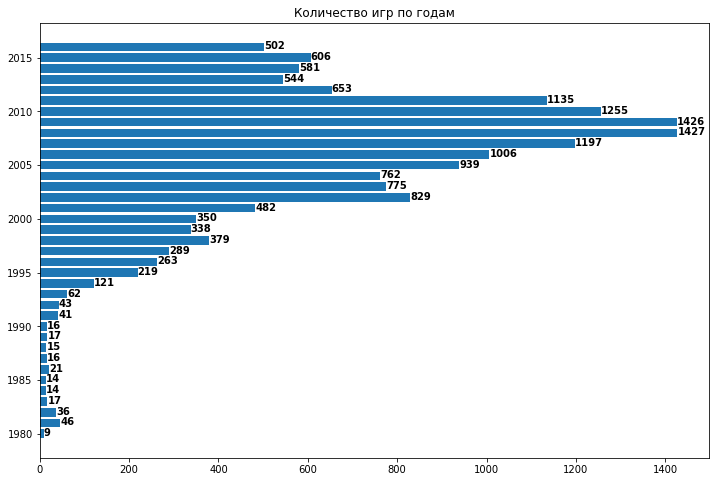

In [38]:
years_pivot = games.pivot_table(index='year_of_release',
                                 values='sum_sales', 
                                 aggfunc='count')

years_pivot.columns = ['games_quantity']


fig, ax = plt.subplots(figsize=(12,8))
ax.barh(years_pivot.index, years_pivot['games_quantity'])
ax.set_title('Количество игр по годам')

for i in ax.patches:
    plt.text(i.get_width()+0.1,
    i.get_y()+0.2, str(round(i.get_width(),1)),
    fontsize=10, fontweight='bold', color='black')

plt.show()

Видим, что период с 1980 по 1990 годы - "заря" развития игровой индустрии. Далее был уверенный подъем до 1998 года. Самое большое количество игр было произведено в 2008-2009 годах, после чего произошел сначала небольшой спад производства, а в 2012 производство и вовсе упало в два раза по сравнению с 2011 годом. Далее спад продолжается, истинных геймеров становится все меньше, да и рынок видеоигр постепенно замещается рынком мобильных игр.

Посмотрим, как менялись продажи игр по платформам:

In [39]:
platform_pivot = games.pivot_table(index='platform',
                                 values='sum_sales', 
                                 aggfunc='sum').sort_values(by='sum_sales',
                                                            ascending=False)

display(platform_pivot)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Самая прибыльная платформа - PS2. Будем считать прибыльными шесть платформ: PS2, X360, PS3, Wii, DS и PS. PS4 уже сильно отстает по выручке. Для каждой из прибыльных платформ построим распределение продаж по годам:

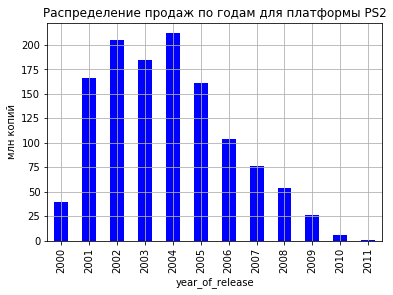

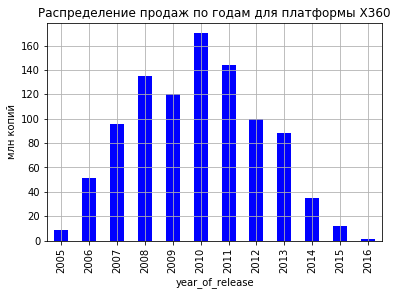

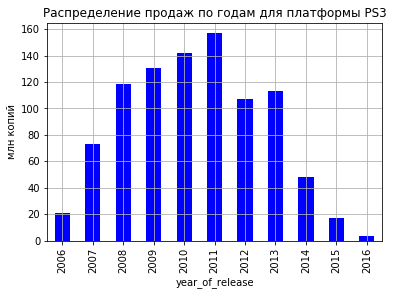

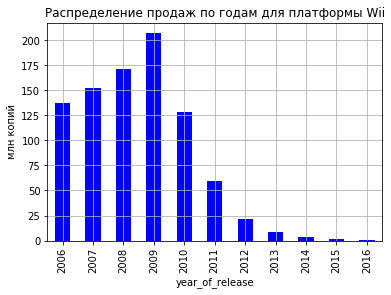

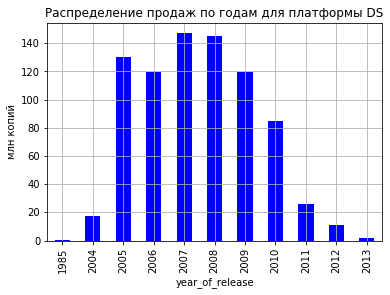

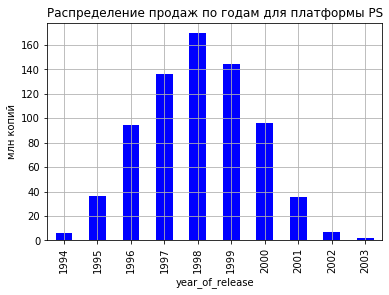

In [40]:
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in platform_list:
    data = games.query('platform == @platform').pivot_table(index='year_of_release', 
                                                            values='sum_sales', 
                                                            aggfunc='sum')
    
    data.plot(y='sum_sales', kind='bar', color='blue', legend=False, grid=True)
    plt.title('Распределение продаж по годам для платформы ' + platform)
    plt.ylabel('млн копий')

Странно выглядит одна игра, выпущенная в 1985 году для платформы DS, хотя сама платформа была выпущена в 2004 году. Посмотрим, что это за игра:

In [41]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


Игра для японского рынка, к тому же непопулярная. Возможно, в 1985 году в Японии действительно существовал "предок" платформы DS с таким же названием. 

Вот какие можно сделать выводы:

- PS2 просуществовала с 2000 по 2011 год, была самой успешной в коммерческом плане; за все годы существования платформы было продано 1233,56 млн копий игр. С 2001 по 2005 год успех этой платформы держался на одном уровне, с 2006 года пошел на спад. Возможно, это связано с выходом более "свежей" PS3;

- X360 существовала с 2005 по 2016 годы; за это время было продано 961,24 млн копий игр. 2008-2011 гг. можно назвать самыми успешными для этой платформы, с 2012 начался постепенный спад;

- PS3 просуществовала с 2006 по 2016 гг., за это время было продано 931,34 млн копий игр. Платформа была задумана как замена PS2, но успех своей предшественницы ей повторить не удалось;

- Wii существовала с 2006 по 2016 гг., но "сдуваться" начала еще в 2012;

- DS существовала с 2004 по 2013 гг, в 2005-2009 темп продаж игр почти не снижался;

- PS существовала с 1994 по 2003 гг., и даже несмотря на выпуск PS2 (2000 год), игр для PS в 2000 году было продано больше, чем для более "свежей" PS2. Далее начался спад.

Судя по графикам, средний срок жизни игровой платформы составляет 10 лет. За это время успевают устареть компоненты в старых приставках, ну и производителям нужно как-то продвигать новую продукцию. Поддержка старых платформ прекращается.

Для дальнейшего анализа и прогноза продаж будем считать актуальным период с 2013 по 2016 гг. Это время "расцвета" двух мега-популярных платформ: XOne и PS4. Сформируем датафрейм, содержащий актуальный период.

In [42]:
games = games.query('2013 <= year_of_release <= 2016')
games.shape[0]

2233

Осталось 2233 строки, по этим данным мы сможем построить прогноз продаж на 2017 год.

Составим сводную таблицу продаж игр для актуального периода (2013-2016):

In [43]:
platform_pivot = games.pivot_table(index='platform',
                                 values='sum_sales',
                                 aggfunc='sum').sort_values(by='sum_sales',
                                                            ascending=False)

display(platform_pivot)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Визуализируем распределение продаж по годам:

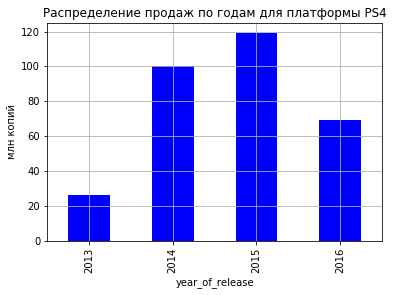

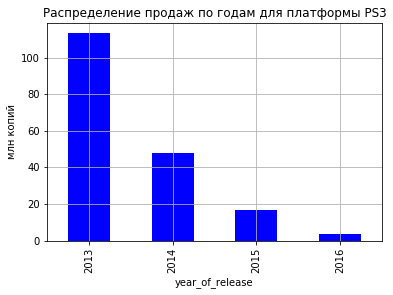

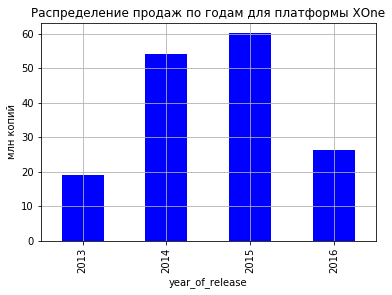

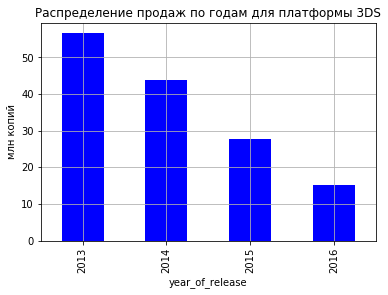

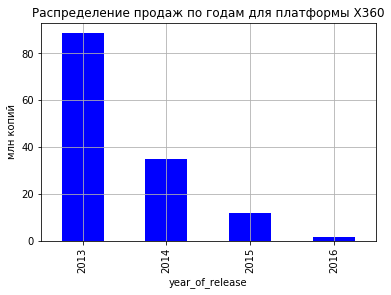

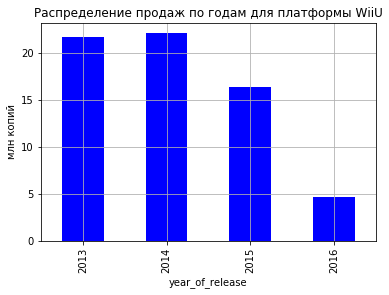

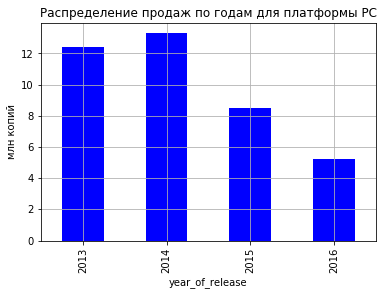

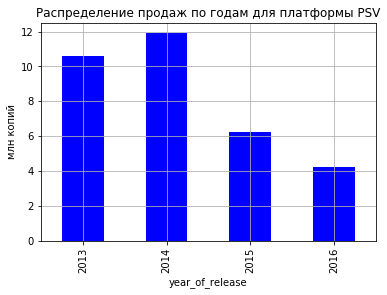

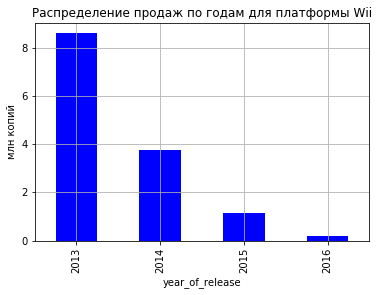

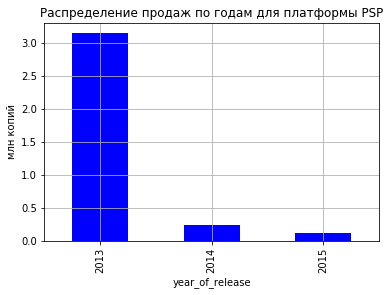

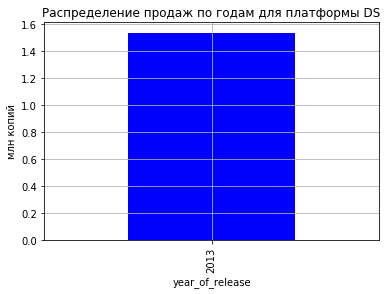

In [44]:
platform_list = platform_pivot.index.tolist()

for platform in platform_list:
    data = games.query('platform == @platform').pivot_table(index='year_of_release', 
                                                            values='sum_sales', 
                                                            aggfunc='sum')
    
    data.plot(y='sum_sales', kind='bar', color='blue', legend=False, grid=True)
    plt.title('Распределение продаж по годам для платформы ' + platform)
    plt.ylabel('млн копий')

Можно сказать, что к 2016 году уже вся индустрия видеоигр "не на коне". Везде продажи падают, поддержка некоторых платформ уже прекращена.

Из всех платформ заметно выделяется PS4 - у нее самые высокие продажи за 2013-2016.
Для ТОП-5 платформ (PS4, XOne, 3DS, X360, PS3) построим диаграмму размаха:

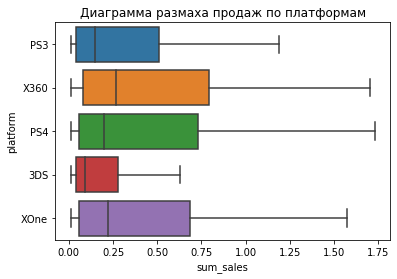

In [45]:
sns.boxplot(y='platform', x='sum_sales', showfliers=False, orient='h', data=games.query('"PS4" in platform or "XOne" in platform or "3DS" in platform or "X360" in platform or "PS3" in platform'))
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

Посчитаем среднее, медиану, дисперсию и стандартное отклонение:

In [46]:
games_rev_5 = games.query('"PS4" in platform or "XOne" in platform or "3DS" \
                          in platform or "X360" in platform or "PS3" in platform')

games_rev_5.pivot_table(index = 'platform', values = 'sum_sales', 
                        aggfunc = ['mean', 'median', 'var', 'std']).style.format('{:.2f}')

,mean,median,var,std
,sum_sales,sum_sales,sum_sales,sum_sales
platform,,,,
3DS,0.47,0.09,1.91,1.38
PS3,0.53,0.15,2.11,1.45
PS4,0.80,0.20,2.59,1.61
X360,0.74,0.27,2.77,1.66
XOne,0.65,0.22,1.07,1.04


Самая высокая медиана продаж у X360 (0,27 млн копий), далее идут XOne и PS4 с медианами 0,22 и 0,2 млн копий соответственно. Медианы всех распределений меньше среднего, значит, распределения смещены вправо, с длинным "хвостом".

Проверим, как влияют на продажи игр отзывы пользователей и критиков:

In [47]:
ps4 = games.query('"PS4" in platform')
ps3 = games.query('"PS3" in platform')
xone = games.query('"XOne" in platform')
x360 = games.query('"X360" in platform')
three_ds = games.query('"3DS" in platform')

In [48]:
def corr(data):
    sns.pairplot(data[['user_score', 'critic_score', 'sum_sales']])
    plt.figure(figsize=(1,8))
    sns.heatmap(data.corr()[['sum_sales']].sort_values(by='sum_sales',
                                                     ascending=False),
                                                        cmap='RdYlGn', 
                                                           annot=True,
                                                annot_kws={'size':12})
    plt.show()

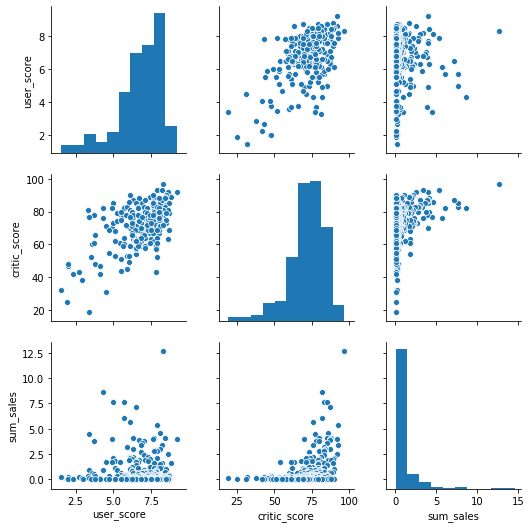

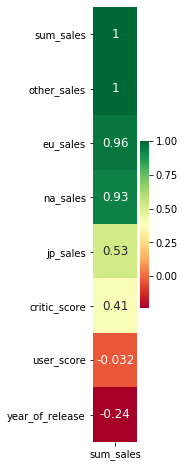

In [49]:
corr(ps4)

Видим, что для PS4 отзывы критиков влияют на количество продаж (умеренная корреляция), а вот отзывы пользователей - не влияют. Сравним с другими платформами:

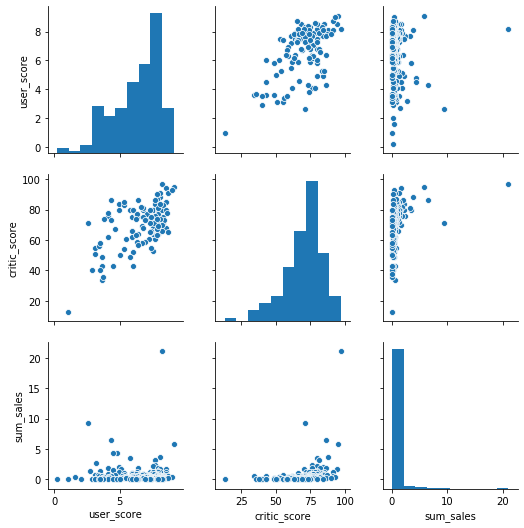

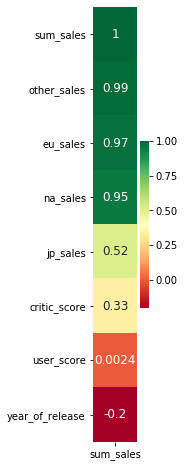

In [50]:
corr(ps3)

Для PS3 отзывы критиков влияют на количество продаж (умеренная корреляция), отзывы пользователей тоже влияют, но очень слабо.

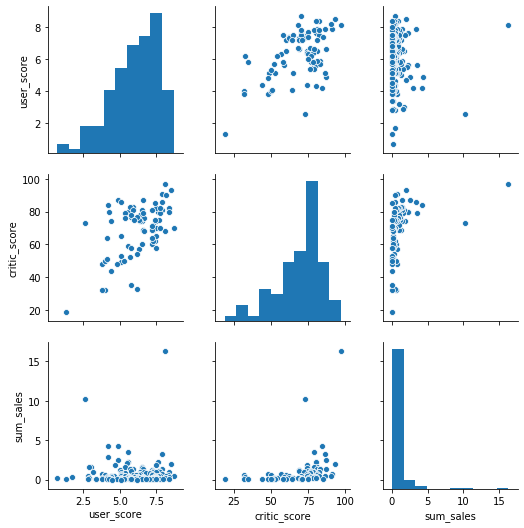

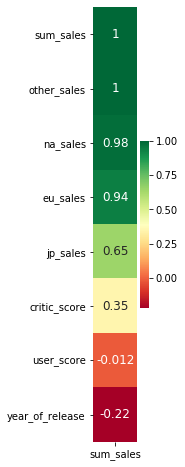

In [51]:
corr(x360)

Для X360 оценки критиков важны (умеренная корреляция), а вот пользователей - не важны.

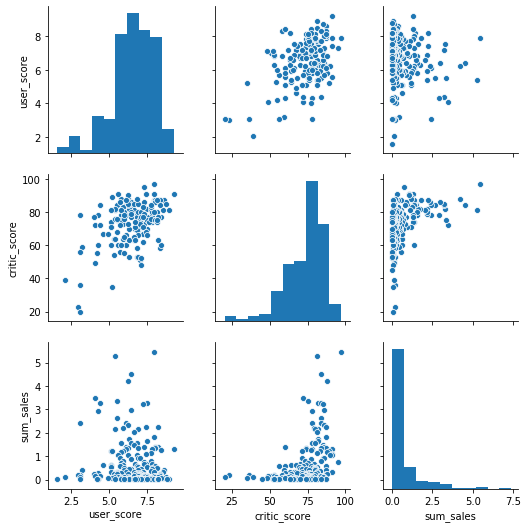

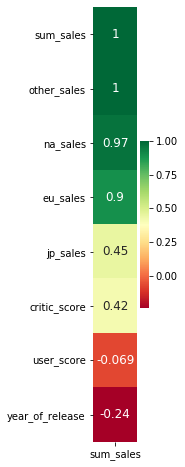

In [52]:
corr(xone)

У XOne похожая ситуация. Отзывы критиков влияют на количество продаж (умеренная корреляция), отзывы пользователей - не влияют.

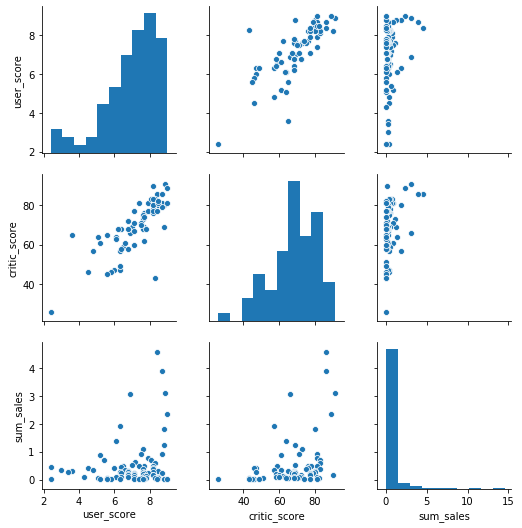

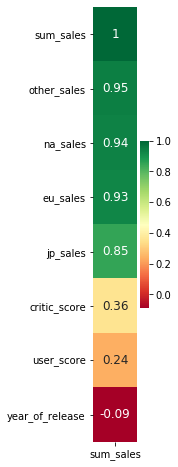

In [53]:
corr(three_ds)

Для 3DS отзывы критиков влияют на количество продаж (умеренная корреляция), отзывы пользователей тоже влияют, и сильнее, чем на других платформах.

Отзывы критиков влияют на продажи на всех платформах, отзывы пользователей влияют меньше. 

Построим график общего распределения игр по жанрам:

,count_games,sum_sales,sales_per_game
genre,,,
Action,766,321.87,0.42
Shooter,187,232.98,1.25
Sports,214,150.65,0.70
Role-Playing,292,145.89,0.50
Misc,155,62.82,0.41
Platform,74,42.63,0.58
Racing,85,39.89,0.47
Fighting,80,35.31,0.44
Adventure,245,23.64,0.10


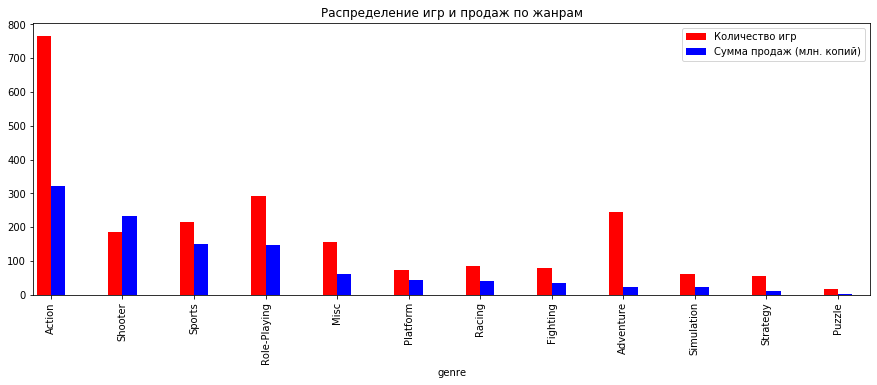

In [54]:
ax=plt.gca()
    
genres_pivot = games.pivot_table(index='genre',
                                 values='sum_sales', 
                                 aggfunc=['count', 'sum'])

genres_pivot.columns = ['count_games', 'sum_sales']

#создадим столбец "продаж на каждую игру"
genres_pivot['sales_per_game'] = (genres_pivot['sum_sales']/genres_pivot['count_games']).round(2)
genres_pivot.sort_values(by='sum_sales', ascending=False, inplace=True)                       
                       

genres_pivot.plot(y='count_games', kind='bar', ax=ax, position=1, color='red', figsize=(15,5), width=0.2)
genres_pivot.plot(y='sum_sales', kind='bar', ax=ax, position=0, color='blue', figsize=(15,5), width=0.2)
ax.legend(['Количество игр', 'Сумма продаж (млн. копий)'])
plt.title('Распределение игр и продаж по жанрам')

display(genres_pivot)
plt.show()

Видим, что лучше всего продаются игры жанра Action, и больше всего игр выпускается в этом жанре. Немного хуже продаются игры жанра Sports, Shooter и Role-playing. Самые низкие продажи у жанров Puzzle и Strategy. Следует также отметить, что в жанрах Role-playing и Adventure вышло схожее количество игр, но продажи Adventure заметно хуже. Интересно выглядит Shooter: суммарные продажи игр в этом жанре больше выпущенных игр. То есть в среднем продается 1,25 млн копий каждой игры. Получается, поклонники жанра Shooter ждут выпуска новых игр, и ни одна игра не остается незамеченной. Это успех.

### Вывод: 

В этом разделе мы провели исследовательский анализ самых популярных игровых платформ, определили наиболее прибыльные жанры, узнали, как соотносятся продажи игр с отзывами пользователей и критиков. Теперь сформируем портрет пользователя игр каждого региона (NA, EU, JP).

## 4. Портрет пользователя каждого региона

Напишем функцию для прописовки графиков продаж в регионе:

In [55]:
def pivot_regions(sales, color):
    platform = games.pivot_table(index='platform', values=sales, aggfunc='sum').sort_values(by=sales, ascending=False)[:5]
    #добавим столбец с процентом продаж по региону
    platform['percent_total_sales_in_region'] = ((platform[sales]/games[sales].sum())*100).round(1)
    genres = games.pivot_table(index='genre', values=sales, aggfunc='sum').sort_values(by=sales, ascending=False)[:5]
    esrb = games.pivot_table(index='rating', values=sales, aggfunc='sum').sort_values(by=sales, ascending=False)
    
    display(platform)
    
    platform.plot(y=sales, kind='bar', color=color, rot=0, 
              title='Продажи по платформам', figsize=(10,6), legend=False)
    plt.ylabel('млн копий')
      
    
    display(genres)
    
    genres.plot(y=sales, kind='bar', color=color, rot=45, 
              title='Продажи по жанрам', figsize=(10,6), legend=False)
    plt.ylabel('млн копий')
    
    display(esrb)
    
    esrb.plot(y=sales, kind='bar', color=color, rot=0, 
              title='Продажи по ESRB рейтингу', figsize=(10,6), legend=False)
    plt.ylabel('млн копий')
    
    plt.show()

Получим графики для Северной Америки (NA):

,na_sales,percent_total_sales_in_region
platform,,
PS4,108.74,24.8
XOne,93.12,21.3
X360,81.66,18.7
PS3,63.50,14.5
3DS,38.20,8.7


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,na_sales
rating,
M,165.21
undefined,89.42
E,79.05
E10+,54.24
T,49.79


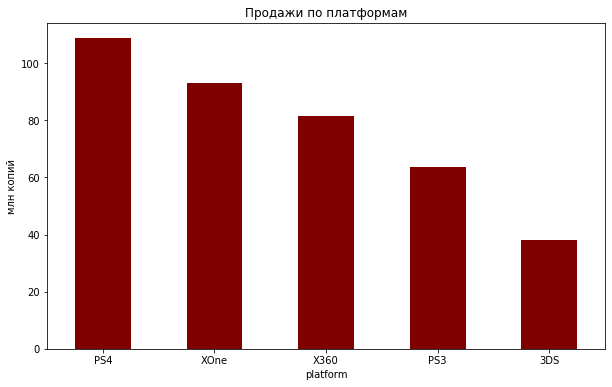

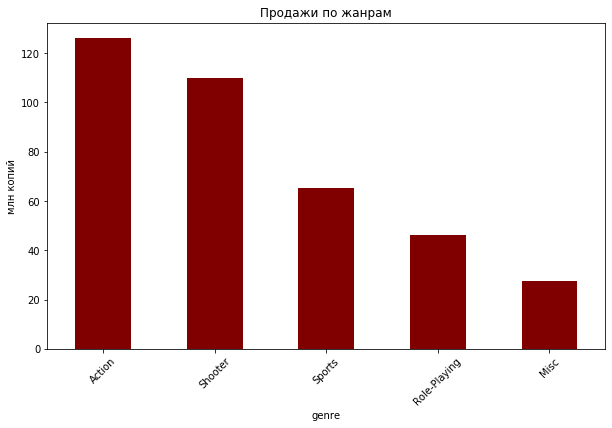

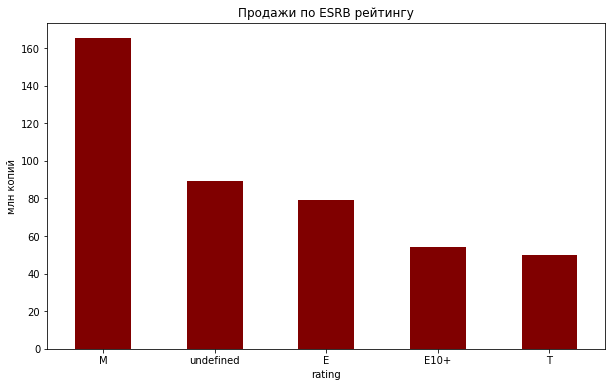

In [56]:
pivot_regions('na_sales', 'maroon')

В ТОП-5 самых популярных консолей Северной Америки входят: X360, XOne, PS3, 3DS, PS4. Доля продаж игр для ТОП-5 консолей составляет 88% всех продаж по региону.
PS4 удерживает уверенное первое место.

По жанрам лидирует Action. Замыкает пятерку лидеров Misc(смешанный жанр).

Рейтинг ESRB влияет на продажи в Северной Америке следующим образом:
в основном продаются игры M (для всех от 17 лет). За ними идут игры без рейтинга (undefined) и игры для всех (E). 

Посмотрим на графики для Европы:


,eu_sales,percent_total_sales_in_region
platform,,
PS4,141.09,36.0
PS3,67.81,17.3
XOne,51.59,13.2
X360,42.52,10.8
3DS,30.96,7.9


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,eu_sales
rating,
M,145.32
E,83.36
undefined,78.91
E10+,42.69
T,41.95


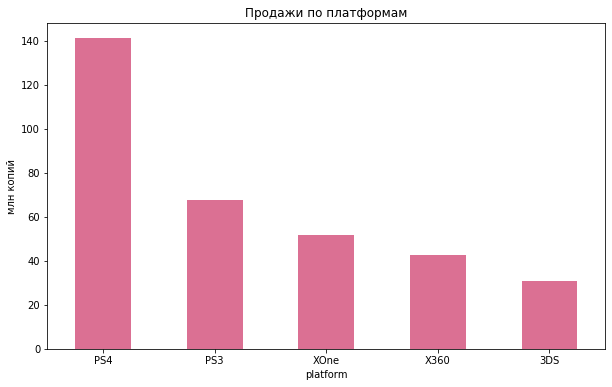

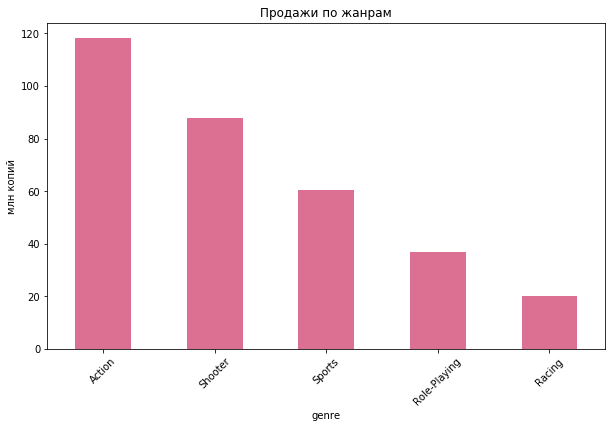

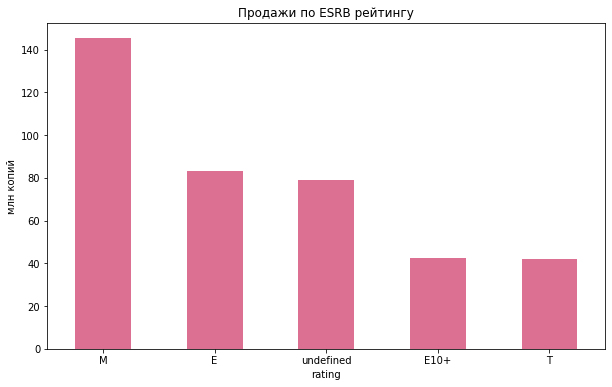

In [57]:
pivot_regions('eu_sales', 'palevioletred')

В Европе ТОП-5 консолей такой же, как в Северной Америке: PS3, X360, XOne, 3DS и PS4. Доля продаж игр для ТОП-5 консолей составляет 85,2% от всех продаж по региону.
PS4 и здесь на уверенном первом месте с большим отрывом.

Пятерка лучших жанров тут cхожа с Северной Америкой, различается лишь пятый жанр - в Европе это Racing.

Рейтинг ESRB влияет на продажи в Европе следующим образом:
в основном продаются игры M (для всех старше 17 лет), причем с большим отрывом. Продажи игр для всех (E) и игр с неопределенным рейтингом (undefined) практически равны.

Посмотрим на графики для Японии:

,jp_sales,percent_total_sales_in_region
platform,,
3DS,67.81,48.2
PS3,23.35,16.6
PSV,18.59,13.2
PS4,15.96,11.3
WiiU,10.88,7.7


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


,jp_sales
rating,
undefined,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


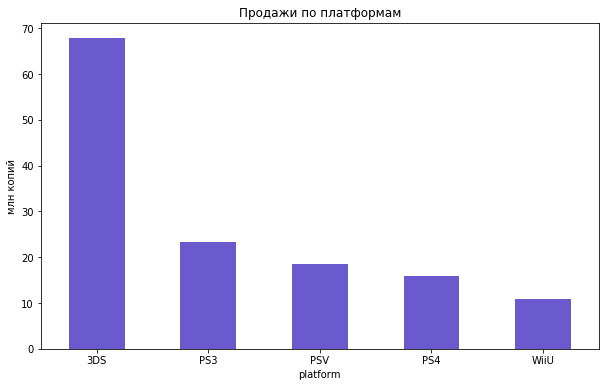

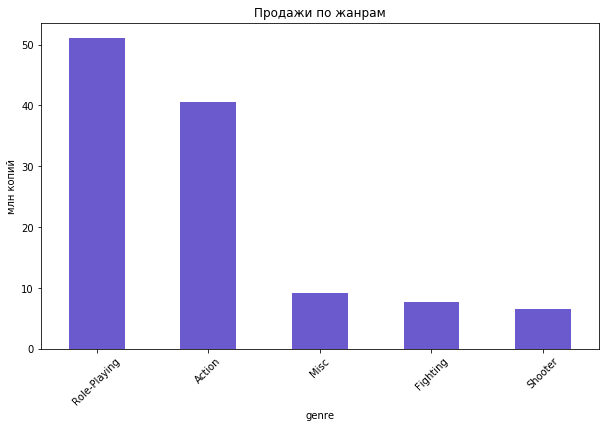

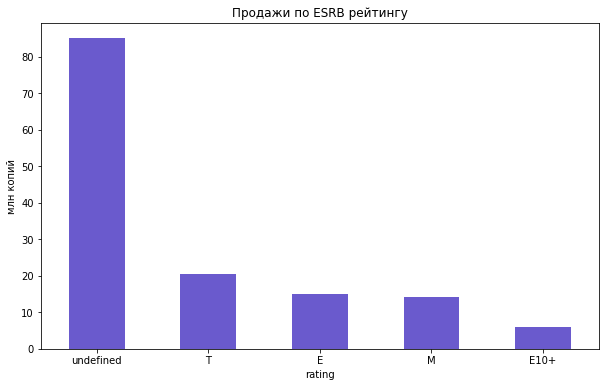

In [58]:
pivot_regions('jp_sales', 'slateblue')

Япония всегда отличается от других :)

ТОП-5 консолей в Японии: 3DS, PS3, PSV, PS4, WiiU. Доля продаж игр для ТОП-5 консолей в Японии составляет 97% всех продаж по региону.
3DS на первом месте с большим отрывом. Любят японцы все отечественное.

По жанрам тут лидирует Role-playing. Немного отстает Action. Замыкает пятерку лидеров Shooter.

ESRB рейтинг тут интересно влияет на продажи:
больше всего покупают игры без рейтинга, видимо, японцы не смотрят на это. Далее идут игры рейтинга T(13-19 лет) и E(для всех). В Японии начинают играть рано :)

### Вывод: 

И в Северной Америке, и в Европе ТОП-5 консолей одинаковый: PS4, PS3, XOne, X360, 3DS. PS4 лидирует и там, и там, даже несмотря на то, что X360 и Xone - разработка Microsoft. В Японии лидирует "родная" 3DS.

Популярность жанров в Северной Америке и Европе практически не отличается, четверка лидеров одинакова: Action, Shooter, Sports, Role-playing. Различается только пятый по популярности жанр: в Северной Америке это Misc, в Европе - Racing. А вот Япония удивила: там больше всего любят Role-playing.

По рейтингу ESRB и Северная Америка, и Европа не отличаюся: везде лучше продаются игры категории M (для всех старше 17 лет). 

В Японии вообще другая ситуация - там в сновном покупают игры без возрастного рейтинга.

## 5. Проверка гипотез

В данном разделе нам необходимо проверить две статистические гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Начнем с первой.
Сформируем датасеты по требуемым платформам:

In [59]:
sample_xone = games.query('platform == "XOne" and user_score.notnull()')

sample_pc = games.query('platform == "PC" and user_score.notnull()')

In [60]:
display(sample_xone.shape[0])
sample_pc.shape[0]

182

155

Датасет sample_xone содержит 182 строки, а sample_pc - 155.
Взглянем на гистограммы для оценки нормальности распределения:

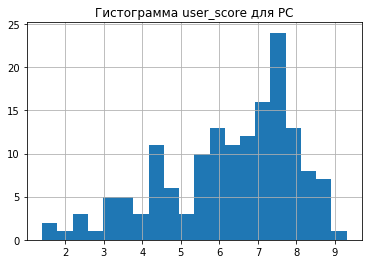

In [61]:
sample_pc['user_score'].hist(bins=20)
plt.title('Гистограмма user_score для PC')                  
plt.show()

Данная гистограмма скошена вправо.

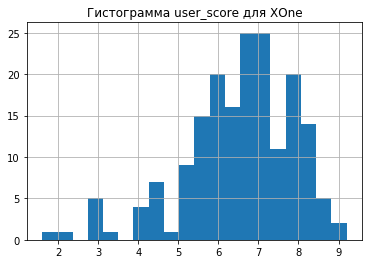

In [62]:
sample_xone['user_score'].hist(bins=20)
plt.title('Гистограмма user_score для XOne')
plt.show()

Здесь та же ситуация.
Можно сказать, что оба распределения не являются нормальными, но при большом количестве значений стремятся к нормальному. Поэтому можно применить тест Стьюдента. Можно было бы применить непараметрический критерий Манна-Уитни, но он чувствителен к повторяющимся значениям, а таких у нас много. Для определения равенства дисперсий (параметр equal_var) воспользуемся тестом Флигнера-Килина. Сформулируем гипотезы:

* Н0 - дисперсии равны;
* Н1 - дисперсии не равны.

In [63]:
alpha = 0.05
stat, p = st.fligner(sample_pc['user_score'], sample_xone['user_score'])


print('p-значение = ', p)

if p < alpha:
    print('Отклонить нулевую гипотезу')
    
else:
    print('Не получилось отклонить нулевую гипотезу')

p-значение =  0.0055008074039634485
Отклонить нулевую гипотезу


Дисперсии различаются статистически значимо. Значит, в тесте Стьюдента укажем параметр equal_var=False. Посмотрим, чему же равны дисперсии:

In [64]:
[np.var(x, ddof=1) for x in [sample_pc['user_score'], sample_xone['user_score']]]

[3.035892752408882, 1.9069968429360695]

Различие статистически значимое.

Теперь можно применить тест Стьюдента. Сформулируем гипотезы:

* Н0 - средние пользовательские рейтинги платформ XOne и PC равны;
* Н1 - средние пользовательские рейтинги платформ XOne и PC не равны.

In [65]:
alpha = 0.05
stat, p = st.ttest_ind(sample_pc['user_score'], sample_xone['user_score'], equal_var=False)

print('p-значение = ', p)

if p < alpha:
    print('Отклонить нулевую гипотезу')
    
else:
    print('Не получилось отклонить нулевую гипотезу')

p-значение =  0.14759594013430463
Не получилось отклонить нулевую гипотезу


Нулевую гипотезу отклонить не получилось, значит средние пользовательские рейтинги платформ XOne и PC одинаковые.
Теперь проверим вторую гипотезу. Сформируем датасеты по жанрам:

In [66]:
sample_action = games.query('genre == "Action" and user_score.notnull()')

sample_sports = games.query('genre == "Sports" and user_score.notnull()')

In [67]:
display(sample_action.shape[0])
sample_sports.shape[0]

389

160

Датасет sample_action содержит 389 строк, а sample_sports - 160.
Взглянем на гистограммы для оценки нормальности распределения:

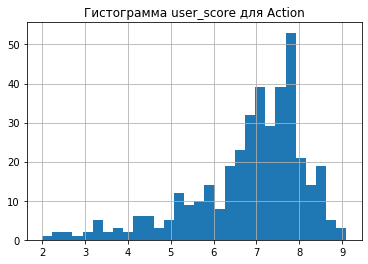

In [68]:
sample_action['user_score'].hist(bins=30)
plt.title('Гистограмма user_score для Action')
plt.show()

Распределение смещено вправо.

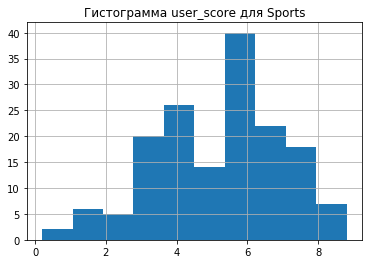

In [69]:
sample_sports['user_score'].hist(bins=10)
plt.title('Гистограмма user_score для Sports')
plt.show()

Это распределение не является нормальным, но отклонения от нормальности не столь существенны. Будем применять тест Стьюдента. Для начала проверим гипотезу о равенстве дисперсий тестом Флигнера-Килина:

* Н0 - дисперсии равны;
* Н1 - дисперсии не равны.

In [70]:
alpha = 0.05
stat, p = st.fligner(sample_action['user_score'], sample_sports['user_score'])


print('p-значение = ', p)

if p < alpha:
    print('Отклонить нулевую гипотезу')
    
else:
    print('Не получилось отклонить нулевую гипотезу')

p-значение =  1.7392959849647607e-07
Отклонить нулевую гипотезу


Дисперсии не равны. Укажем в тесте Стьюдента парметр equal_var=False. Проверим, чему же равны дисперсии:

In [71]:
[np.var(x, ddof=1) for x in [sample_action['user_score'], sample_sports['user_score']]]

[1.7693609042482705, 3.180612814465409]

Действительно, различие статистически значимое.
Применим тест Стьюдента для проверки гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports не отличаются. Сформулируем нулевую и альтернативную гипотезу:

* Н0 - средние пользовательские рейтинги жанров Action и Sports равны;
* Н1 - средние пользовательские рейтинги жанров Action и Sports не равны.

In [72]:
alpha = 0.05
stat, p = st.ttest_ind(sample_action['user_score'], sample_sports['user_score'], equal_var=False)

print('p-значение = ', p)

if p < alpha:
    print('Отклонить нулевую гипотезу')
    
else:
    print('Не получилось отклонить нулевую гипотезу')

p-значение =  1.4460039700704315e-20
Отклонить нулевую гипотезу


Нулевую гипотезу отвергаем, значит средние пользовательские рейтинги жанров Action и Sports различаются.

### Вывод: 

Средние пользовательские рейтинги платформ XOne и PC различаются статистически незначимо.
Средние пользовательские рейтинги жанров Action и Sports различаются статистически значимо.

## 6. Общий вывод

В целом, к 2016 году весь рынок видеоигр падает. Прошли уже "золотые времена" игровой индустрии. Пользователей уже ничем не удивить: ни качественной графикой, ни самой идеей игры.

Для прогноза продаж на 2017 год можно сделать ставку на следующие жанры: Action, Sports, Shooter и Role-playing - они имеют одинаковую популяность как в Северной Америке, так и в Европе. Платформы следует рассматривать PS4, PS3, X360, XOne и 3DS (на них приходится не менее 85% всех продаж в Северной Америке и Европе). И в Северной Америке, и в Европе лучше продаются игры категорий M(для всех старше 17 лет).

Что касается Японии, то там нужно делать ставку на игры жанра Role-playing и Action. Консоль там популярнее "родная" 3DS. Для японцев неважен возрастной рейтинг игр - они охотнее всего покупают игры без рейтинга.

На продажи влияют также оценки критиков и пользователей, это нужно учесть при планировании рекламной кампании. Например, делать пользователю скидку на покупку следующей игры при оценке текущей игры.